<center> <h1>Homework 2 | DATA 5600</h1> </center>
<center> <h2>Simple Linear Regression Model Assumptions</h2> </center>
<center> <h3> Dallin Moore <h3> <center>

## Data and Description

One key component of determining appropriate speed limits is the amount of distance that is required to stop at a given speed. For example, in residential neighborhoods, when pedestrians are commonly in the roadways, it is important to be able to stop in a very short distance to ensure pedestrian safety. The speed of vehicles may be useful for determining the distance required to stop at that given speed, which can aid public officials in determining speed limits.

The Stopping Distance data set compares the **distance (column 2)** (in feet) required for a car to stop on a certain rural road against the **speed (column 1)** (MPH) of the car. Download the StoppingDistance.txt file from Canvas, and put it in the same folder as this Jupyter file.

#### 0. Replace the text "\< PUT YOUR NAME HERE \>" with your full name.  Load necessary libraries below.

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stat

#### 1. Read in the data set, and call the dataframe "stop". Print the first few rows of the data. Print a summary of the data and make sure the data makes sense.

In [5]:
stop = pd.read_csv("StoppingDistance.txt", sep=" ")
stop.describe()

Speed    Distance
count  62.000000   62.000000
mean   18.919355   39.306452
std     9.952837   33.375454
min     4.000000    2.000000
25%    10.000000   13.250000
50%    17.500000   29.500000
75%    26.750000   56.750000
max    40.000000  138.000000

#### 2. Create a scatterplot of the data with variables on the appropriate axes, along with their appropriate units.


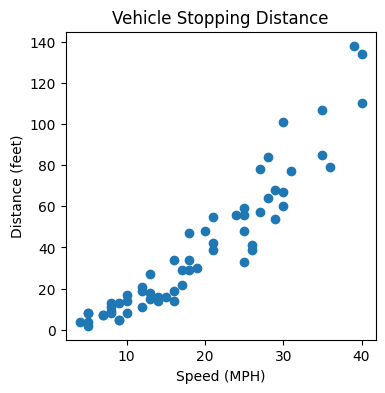

In [20]:
plt.figure(figsize=(4,4))

plt.scatter(stop['Speed'], stop['Distance'])

plt.xlabel('Speed (MPH)')
plt.ylabel('Distance (feet)')
plt.title('Vehicle Stopping Distance')

# Display the plot
plt.show()

#### 3. Briefly describe the relationship between Speed and Distance. (Hint: you should mention 3 key things.)


There appears to be a positive, lon-linear (exponential) relationship between speed and distance. The spread of the data points increases as the values of speed increase, indicating heteroscedasticity.

#### 4. (a) Apply linear regression to the data (no transformations) and print out a summary of the results. (b) Save the residuals and fitted values to the `stop` dataframe.

In [5]:
X = stop['Speed']  # Predictor
y = stop['Distance']  # Response

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Save the residuals and fitted values to the dataframe
stop['Fitted'] = model.fittedvalues
stop['Residuals'] = model.resid

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Distance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     430.6
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           4.58e-29
Time:                        11:51:57   Log-Likelihood:                -239.82
No. Observations:                  62   AIC:                             483.6
Df Residuals:                      60   BIC:                             487.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.1309      3.231     -6.231      0.000     -26.594     -13.668
Speed          3.1416      0.151     20.751      0.000       2.839       3.444
==============================================================================
Omnibus:                        5.200   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                4.333
Skew:                           0.501   Prob(JB):                        0.115
Kurtosis:                       3.820   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 5. Add the OLS regression line to the scatterplot you created in question 2. Print the results.

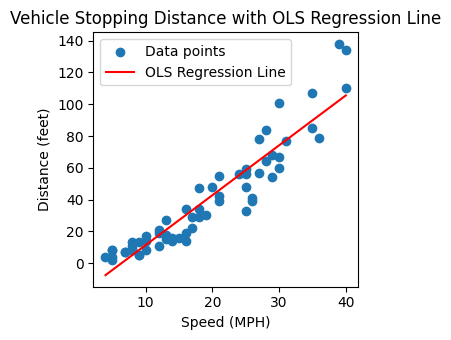

In [35]:
plt.figure(figsize=(3.5,3.5))

plt.scatter(stop['Speed'], stop['Distance'], label='Data points')

# Plot the regression line
plt.plot(stop['Speed'], stop['Fitted'], color='red', label='OLS Regression Line')

plt.xlabel('Speed (MPH)')
plt.ylabel('Distance (feet)')
plt.title('Vehicle Stopping Distance with OLS Regression Line')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

#### 6. Mathematically write out the *fitted* simple linear regression model for this data set using the coefficients you found above. Do not use "x" and "y" in your model - use variable names that are fairly descriptive.

$
\hat{\text{Distance}}_i = \text{-20.1309} + ( \text{3.1416} \cdot \text{Speed}_i )
$

### Questions 7-12 involve using diagnostics to determine if the linear regression assumptions are met. For each assumption, (1) perform appropriate diagnostics to determine if the assumption is violated, and (2) explain whether or not you think the assumption is violated and why you think that.

#### 7. (L) X vs Y is linear (use all three diagnostic tools)


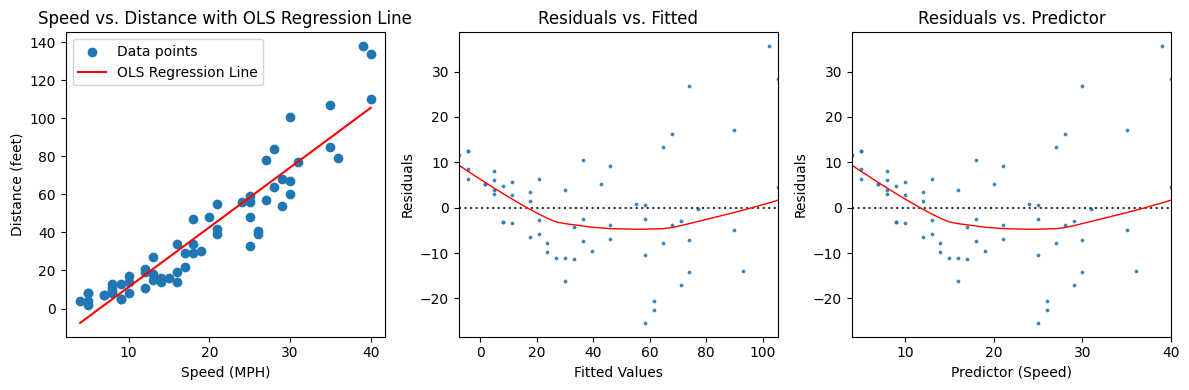

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Scatter plot
axes[0].scatter(stop['Speed'], stop['Distance'], label='Data points')
axes[0].plot(stop['Speed'], stop['Fitted'], color='red', label='OLS Regression Line')
axes[0].set_xlabel('Speed (MPH)')
axes[0].set_ylabel('Distance (feet)')
axes[0].set_title('Speed vs. Distance with OLS Regression Line')
axes[0].legend()

# Residuals vs Fitted plot
sns.residplot(x=stop['Fitted'],
              y=stop['Residuals'],
              lowess=True,
              scatter_kws={'s': 3},
              line_kws={'color': 'red', 'lw': 1},
              ax=axes[1])  # Specify the first axis
axes[1].set_title("Residuals vs. Fitted")
axes[1].set_ylabel("Residuals")
axes[1].set_xlabel("Fitted Values")

# Residuals vs Predictor Plot
sns.residplot(x=stop['Speed'],
              y=stop['Residuals'],
              lowess=True,
              scatter_kws={'s': 3},
              line_kws={'color': 'red', 'lw': 1},
              ax=axes[2])
axes[2].set_ylabel("Residuals")
axes[2].set_xlabel("Predictor (Speed)")
axes[2].set_title("Residuals vs. Predictor")

# Show the plots
plt.tight_layout()
plt.show()


Based on all 3 plots, it appears that the relationship between the predictor variable (Speed) and the response variable (Distance) is not perfectly linear. In the *Residuals vs. Fitted* plot, there is a noticeable curve in the red trend line, indicating that the residuals are not randomly scattered around zero. This suggests some non-linearity in the relationship between the fitted values and the residuals. In the *Residuals vs. Predictor* plot, a similar curve appears here, reinforcing the idea that the relationship between Speed and Distance may not be strictly linear. The residuals show a systematic pattern, which deviates from what we expect under linearity (random distribution around zero).


While the overall trend shows a positive relationship (as seen in the *Speed vs. Distance* plot), the curved patterns in the residuals suggest that a simple linear model might not fully capture the relationship. A transformation of the variables or a different model might be more appropriate for fitting the data.

#### 8. (I) The residuals are independent (no diagnostic tools - just think about how the data was collected and briefly write your thoughts)


If each observation corresponds to an independent test (different speeds and potentially different cars), there would be no reason to expect one measurement to influence another. This suggests that the residuals from one observation are independent of another.

#### 9. (N) The residuals are normally distributed and centered at zero (use all four diagnostic tools)

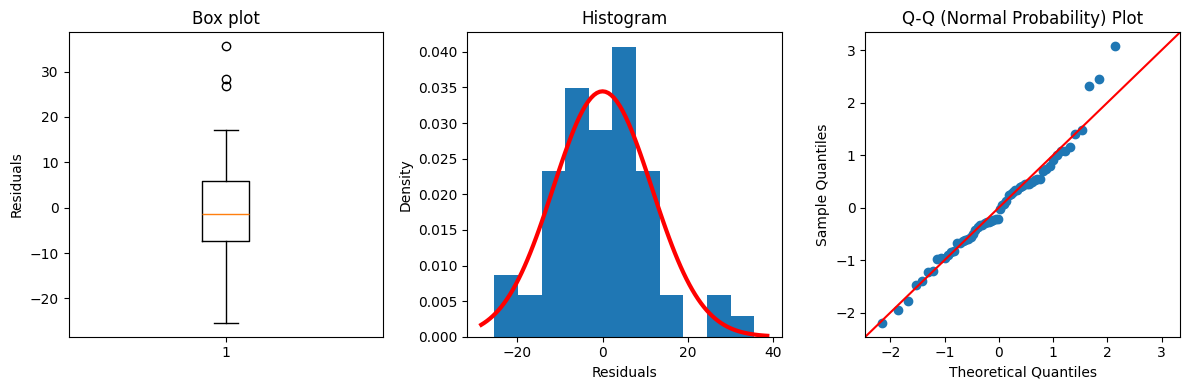

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Box plot
axes[0].boxplot(stop['Residuals'])
axes[0].set_ylabel("Residuals")
axes[0].set_title("Box plot")

# Histogram
axes[1].hist(stop['Residuals'],
            density = True,
            bins = 11)
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Density")

mean = np.mean(stop['Residuals'])
sd = np.std(stop['Residuals'])
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)

axes[1].plot(x,
            stat.norm.pdf(x,mean,sd),
            color = 'r',
            lw = 3)
axes[1].set_title("Histogram")

# Q-Q (Normal Probability) Plot [best]
sm.qqplot(stop['Residuals'],
         line = '45',
         fit = True,
         ax=axes[2])
axes[2].set_title("Q-Q (Normal Probability) Plot")

# Show the plots
plt.tight_layout()
plt.show()

In [50]:
#Shapiro-Wilk Test
stat.shapiro(stop['Residuals'])

ShapiroResult(statistic=np.float64(0.9753286517117782), pvalue=np.float64(0.24492276447098016))

The residuals appear to be approximately normally distributed and centered at zero, although overall slightly right skewed. The box plot and histogram show rough symmetry around zero, the Q-Q plot mostly follows the expected line for a normal distribution, and the Shapiro-Wilk test does not provide evidence against normality (the p-value of 0.2449 is greater than the common significance levels of 0.05 or 0.01, so we fail to reject the null hypothesis of normality).

#### 10. (E) The residuals have equal/constant variance across all values of X (use one diagnostic tool)

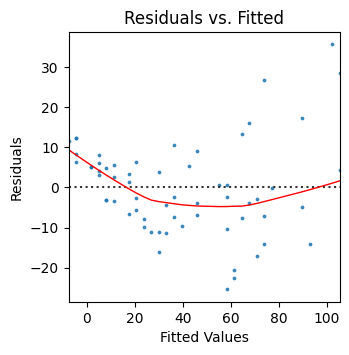

In [53]:
plt.figure(figsize=(3.5,3.5))

# Residuals vs Fitted plot
sns.residplot(x=stop['Fitted'],
              y=stop['Residuals'],
              lowess=True,
              scatter_kws={'s': 3},
              line_kws={'color': 'red', 'lw': 1})  
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")

plt.show()

The variability is not constant, as the Fitted Values increases the absolut value of the residuals also increase indicating that there is some heteroscedasticity.

#### 11. (A) The model describes all observations (i.e., there are no influential points) (use two diagnostic tools). If you identify any influential points, write down what observation/row number they are.

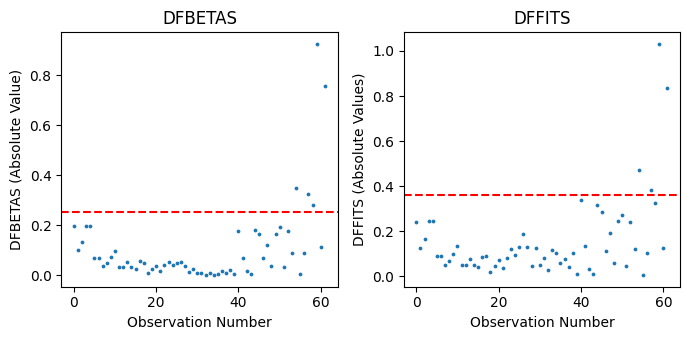

In [61]:
# Make DFBETAS/DFFITS column
stop['DFBETAS'] = model.get_influence().dfbetas[:, 1]
stop['DFFITS'] = model.get_influence().dffits[0]


fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

# Plot DFBETAS
ax[0].scatter(stop.index,
              np.abs(stop['DFBETAS']),
              s=3)
ax[0].axhline(y=2/np.sqrt(len(stop)),
              color='r',
              linestyle='dashed')
ax[0].set_ylabel("DFBETAS (Absolute Value)")
ax[0].set_xlabel("Observation Number")
ax[0].set_title("DFBETAS")

# Plot DFFITS
ax[1].scatter(stop.index, 
              np.abs(stop['DFFITS']), 
              s=3)
ax[1].axhline(y=2 * np.sqrt(len(model.params) / len(stop)), 
              color='r', 
              linestyle='dashed')
ax[1].set_ylabel("DFFITS (Absolute Values)")
ax[1].set_xlabel("Observation Number")
ax[1].set_title("DFFITS")

plt.tight_layout()
plt.show()

In [66]:
# Identify potential influential points
outliers_dfbetas = stop[np.abs(stop['DFBETAS']) > 2 / np.sqrt(len(stop))]
outliers_dfbetas_sorted = outliers_dfbetas.sort_values(by = 'DFBETAS', 
                                                       ascending = False)
outliers_dfbetas_sorted

Speed  Distance      Fitted  Residuals   DFBETAS    DFFITS
59     39       138  102.392173  35.607827  0.925566  1.031373
61     40       134  105.533791  28.466209  0.756184  0.834997
54     30       101   74.117609  26.882391  0.351323  0.470534
57     35       107   89.825700  17.174300  0.324276  0.380510
58     36        79   92.967318 -13.967318 -0.279937 -0.323331

In [65]:
outliers_dffits = stop[np.abs(stop['DFFITS']) > 2 * np.sqrt(len(model.params) / len(stop))]
outliers_dffits_sorted = outliers_dffits.sort_values(by = 'DFFITS', 
                                                     ascending = False)
outliers_dffits_sorted

Speed  Distance      Fitted  Residuals   DFBETAS    DFFITS
59     39       138  102.392173  35.607827  0.925566  1.031373
61     40       134  105.533791  28.466209  0.756184  0.834997
54     30       101   74.117609  26.882391  0.351323  0.470534
57     35       107   89.825700  17.174300  0.324276  0.380510

Both plots suggest there are influential points, particularly near the end of the dataset (observations 54-61). These points have a disproportionate impact on the regression model's coefficients and predictions. The points with high DFBETAS and DFFITS values may also be outliers, as they seem to deviate significantly from the pattern of the other observations. The presence of these influential points suggests that the regression model might be overly sensitive to a few observations, which could lead to instability in the model and affect its generalizability.

#### 12. (R) Additional predictor variables are not required (no diagnostic tools - just think about the variables you have and if there are other variables you think would help predict the response)

Different tires and how much they have been worn may also affect the model, but the data was not collected for this.

#### 13. Based on your analysis of the diagnostic measures, briefly discuss why this simple linear regression model on the raw data (not transformed) is *not* appropriate.

1. **Non-linearity**: The relationship between Speed and Distance is not perfectly linear. This is evident from the Residuals vs. Fitted plot, where the red trend line curves, suggesting that residuals are not randomly scattered around zero. A similar curve in the Residuals vs. Predictor plot reinforces this non-linearity. The systematic pattern in residuals indicates that the simple linear model might not fully capture the relationship between the predictor and response variables.

2. **Residual Normality**: While the residuals appear to be approximately normally distributed and centered around zero, with slight right skewness, normality tests (like the Shapiro-Wilk test) support this approximation. This is confirmed by the Q-Q plot and the box plot, which show rough symmetry around zero. However, this normality alone does not address the non-linearity observed.

3. **Heteroscedasticity**: The variability of residuals is not constant. As the fitted values increase, the absolute value of the residuals also increases, indicating the presence of heteroscedasticity. This suggests that the variance of the residuals changes with the level of the predictor variable.

4. **Influential Points**: There are influential points, particularly near the end of the dataset (observations 54-61). These points have a disproportionate impact on the regression model's coefficients and predictions. High DFBETAS and DFFITS values suggest that these observations may be outliers or leverage points, which could affect the stability and generalizability of the model.


#### 14. Fix the model by making any necessary transformations. Justify the transformation you chose in words (why did you choose to transform just x, just y, or both?). (Note: you will most likely need to repeat questions 14 and 18 until you are satisfied with the transformation you chose. Only then should you fill out this section - I only want to see the model you end up choosing, not all of your attempted models.)


First, we will see if performing a square root or log has a normal distribution

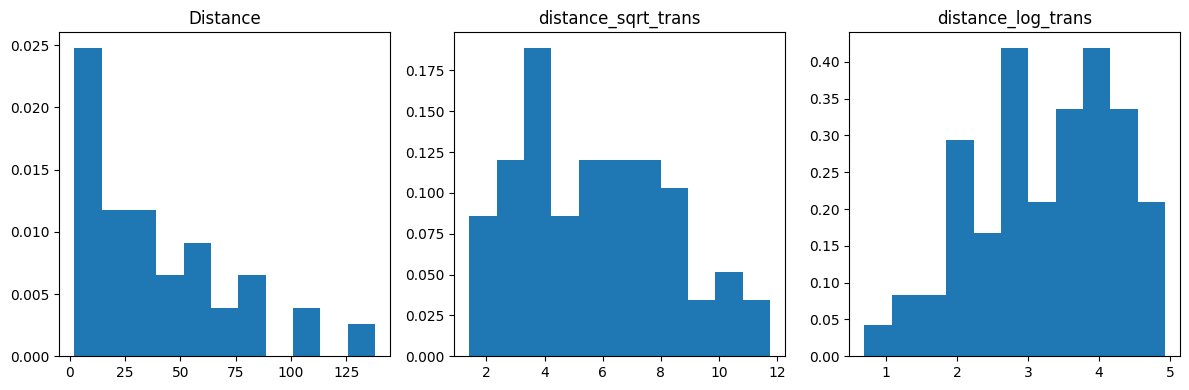

In [67]:
distance_sqrt_trans = np.sqrt(stop['Distance'])
distance_log_trans = np.log(stop['Distance'])

def hist_Y(variable, bin_size, ax, title):
    ax.hist(variable, density=True, bins=bin_size)
    ax.set_title(title)

# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
hist_Y(stop['Distance'], 11, axes[0], 'Distance')  # original Distance
hist_Y(distance_sqrt_trans, 11, axes[1], 'distance_sqrt_trans')  # sqrt(Distance)
hist_Y(distance_log_trans, 11, axes[2], 'distance_log_trans')  # log(Distance)
fig.tight_layout()
plt.show()


Since the log is the closest to normal we will try it first:

In [80]:
# Apply square-root transformation to the Distance column
stop['Distance_trans'] = np.sqrt(stop['Distance'])
y = stop['Distance_trans']
X = sm.add_constant(stop['Speed'])

# Fit the linear regression model
mod = sm.OLS(y, X)
res_trans = mod.fit()

# Print the summary of the regression results
print(res_trans.summary())

# Add residuals and fitted values to the dataframe
stop['residuals_trans'] = res_trans.resid
stop['fittedvalues_trans'] = res_trans.fittedvalues

                            OLS Regression Results                            
Dep. Variable:         Distance_trans   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     741.1
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           1.83e-35
Time:                        17:15:01   Log-Likelihood:                -66.669
No. Observations:                  62   AIC:                             137.3
Df Residuals:                      60   BIC:                             141.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9324      0.198      4.711      0.0

\< your response here \>

### Now, in Questions 15-18, re-check your transformed model and verify that all assumptions are met. Provide a brief discussion about how each of the previously violated assumptions are now satisfied. Also, provide the code you used to assess adherence to the assumptions. (Note that transforming will not change your responses about (I) the residuals being independent and (R) additional predictor variables not being required, so we will skip these assumptions here.)

#### 15. (L) Linearity (use all three diagnostic tools)

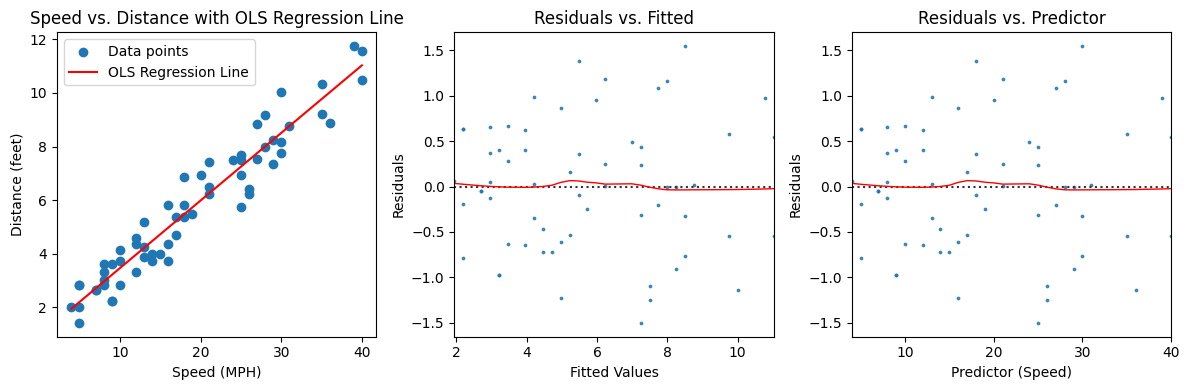

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Scatter plot
axes[0].scatter(stop['Speed'], stop['Distance_trans'], label='Data points')
axes[0].plot(stop['Speed'], stop['fittedvalues_trans'], color='red', label='OLS Regression Line')
axes[0].set_xlabel('Speed (MPH)')
axes[0].set_ylabel('Distance (feet)')
axes[0].set_title('Speed vs. Distance with OLS Regression Line')
axes[0].legend()

# Residuals vs Fitted plot
sns.residplot(x=stop['fittedvalues_trans'],
              y=stop['residuals_trans'],
              lowess=True,
              scatter_kws={'s': 3},
              line_kws={'color': 'red', 'lw': 1},
              ax=axes[1])  # Specify the second axis
axes[1].set_title("Residuals vs. Fitted")
axes[1].set_ylabel("Residuals")
axes[1].set_xlabel("Fitted Values")

# Residuals vs Predictor Plot
sns.residplot(x=stop['Speed'],
              y=stop['residuals_trans'],
              lowess=True,
              scatter_kws={'s': 3},
              line_kws={'color': 'red', 'lw': 1},
              ax=axes[2])
axes[2].set_ylabel("Residuals")
axes[2].set_xlabel("Predictor (Speed)")
axes[2].set_title("Residuals vs. Predictor")

# Show the plots
plt.tight_layout()
plt.show()


Now the data appears linear, and all of the charts are have trend lines very close to zero.

#### 16. (N) The residuals are normally distributed and centered at zero (use all four diagnostic tools)

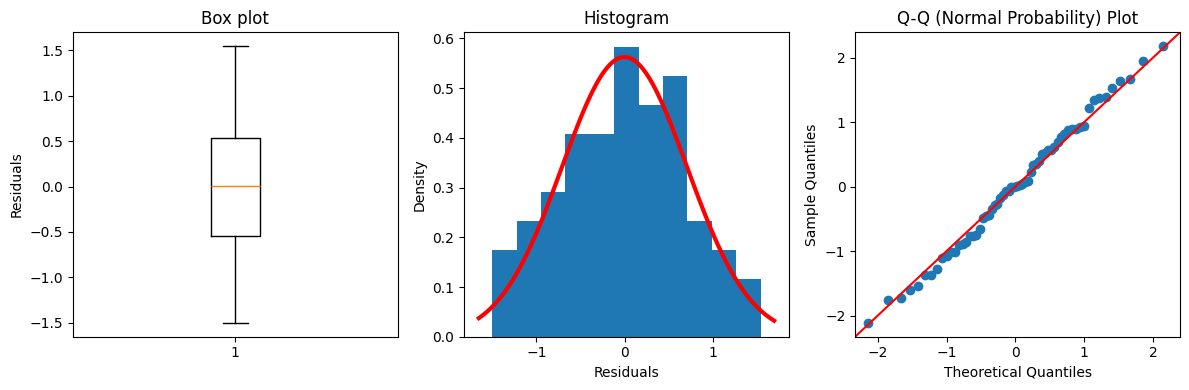

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Box plot
axes[0].boxplot(stop['residuals_trans'])
axes[0].set_ylabel("Residuals")
axes[0].set_title("Box plot")

# Histogram
axes[1].hist(stop['residuals_trans'],
            density=True,
            bins=11)
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Density")

mean = np.mean(stop['residuals_trans'])
sd = np.std(stop['residuals_trans'])
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)

axes[1].plot(x,
            stat.norm.pdf(x, mean, sd),
            color='r',
            lw=3)
axes[1].set_title("Histogram")

# Q-Q (Normal Probability) Plot
sm.qqplot(stop['residuals_trans'],
         line='45',
         fit=True,
         ax=axes[2])
axes[2].set_title("Q-Q (Normal Probability) Plot")

# Show the plots
plt.tight_layout()
plt.show()

In [77]:
#Shapiro-Wilk Test
stat.shapiro(stop['residuals_trans'])

ShapiroResult(statistic=np.float64(0.9880102805981948), pvalue=np.float64(0.8072380068824714))

All 3 plots look normally distributed after the transformation.

#### 17. (E) The residuals have equal/constant variance across all values of X (use one diagnostic tool)

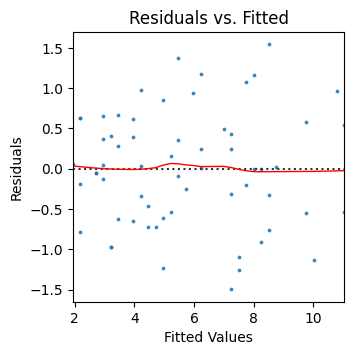

In [78]:
plt.figure(figsize=(3.5, 3.5))

# Residuals vs Fitted plot
sns.residplot(x=stop['fittedvalues_trans'],
              y=stop['residuals_trans'],
              lowess=True,
              scatter_kws={'s': 3},
              line_kws={'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")

plt.show()

The variability is generally consistent as the fitted values increase, although it may be slightly heteroscedastic.

#### 18. (A) The model describes all observations (i.e., there are no influential points) (use two diagnostic tools)

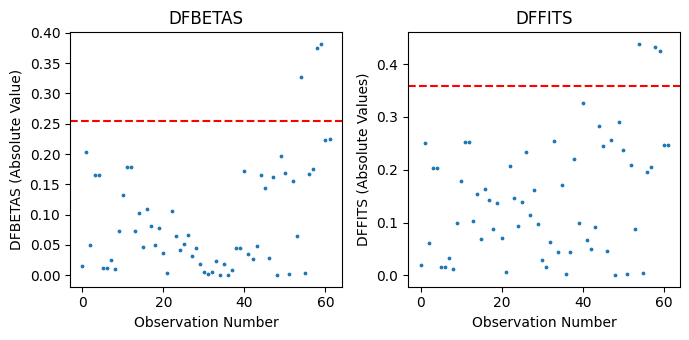

In [79]:
# Compute DFBETAS and DFFITS for the transformed model
influence = res_trans.get_influence()
stop['DFBETAS'] = influence.dfbetas[:, 1]
stop['DFFITS'] = influence.dffits[0]

fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

# Plot DFBETAS
ax[0].scatter(stop.index,
              np.abs(stop['DFBETAS']),
              s=3)
ax[0].axhline(y=2/np.sqrt(len(stop)),
              color='r',
              linestyle='dashed')
ax[0].set_ylabel("DFBETAS (Absolute Value)")
ax[0].set_xlabel("Observation Number")
ax[0].set_title("DFBETAS")

# Plot DFFITS
ax[1].scatter(stop.index, 
              np.abs(stop['DFFITS']), 
              s=3)
ax[1].axhline(y=2 * np.sqrt(len(res_trans.params) / len(stop)), 
              color='r', 
              linestyle='dashed')
ax[1].set_ylabel("DFFITS (Absolute Values)")
ax[1].set_xlabel("Observation Number")
ax[1].set_title("DFFITS")

plt.tight_layout()
plt.show()


Although there are still some values that are influential, there are less for DFBETAS and DFFITS.

#### 19. Mathematically write out the *fitted* simple linear regression model for this data set using the coefficients you found above from your transformed model. Do not use "x" and "y" in your model - use variable names that are fairly descriptive.


$
\hat{\text{Distance}}_i = (\text{0.9324} + ( \text{0.2525} \cdot \text{Speed}_i ))^2 + \epsilon_i
$


#### 20. Plot your new fitted *curve* on the scatterplot of the original data (on the original scale - not the transformed scale). Do you think this curve fits the data better than the line you previously fit?


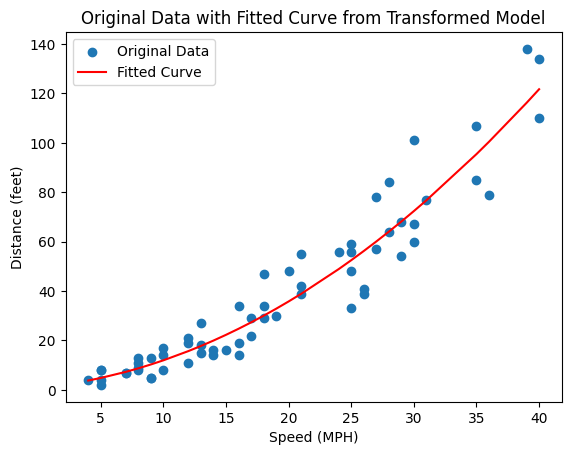

In [85]:
# Extract coefficients from the fitted model using iloc
intercept = res_trans.params.iloc[0]  # Intercept (β0)
slope = res_trans.params.iloc[1]      # Slope (β1)

# Generate predictions on the transformed scale
stop['fittedvalues_trans'] = res_trans.fittedvalues

# Transform the predictions back to the original scale
stop['fittedvalues_original'] = np.square(stop['fittedvalues_trans'])

# Plot the original data
plt.scatter(stop['Speed'], stop['Distance'], label='Original Data')

# Plot the fitted curve on the original scale
plt.plot(stop['Speed'], stop['fittedvalues_original'], color='red', label='Fitted Curve')

# Labels and title
plt.xlabel('Speed (MPH)')
plt.ylabel('Distance (feet)')
plt.title('Original Data with Fitted Curve from Transformed Model')
plt.legend()

plt.show()

The updated line fits very well. It appears that square root was the appropriate transformation.

#### 21. Briefly summarize what you learned from this analysis *to a non-statistician*. Write a few sentences about (1) the purpose of this data set and analysis and (2) what you learned about this data set from your analysis. Write your response as if you were addressing a business manager (avoid using statistics jargon) and just provide the main take-aways.

The purpose of this analysis was to understand how the speed of a car affects the distance needed to stop on a rural road. By examining this data, we aimed to create a model that predicts stopping distance based on speed.

From the analysis, we found that the initial approach to modeling the relationship between speed and stopping distance was not fully accurate. The relationship turned out to be more complex than initially thought. By adjusting our model to account for this complexity, we were able to create a more reliable prediction method. This means we can better estimate how different speeds impact stopping distance, leading to more accurate and safer vehicle performance assessments.